In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/sarot/anaconda3/envs/py3tf/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
MY_BOUNDED_SET = 45000

num_input = 3
num_output = 3

num_hidden1 = 16
num_hidden2 = 16

N_EPOCHS = 10000
epoch = 0
train_rmse_list = []
test_rmse_list = []

session = tf.Session()

In [3]:
x = tf.placeholder(tf.float32, shape=[None, num_input])

y_true = tf.placeholder(tf.float32, shape=[None, num_output], name='y_true')
y_pred = tf.placeholder(tf.float32, shape=[None, num_output])

In [4]:
data_csv = pd.read_csv('../myCSVData.csv')
X = data_csv[['in1','in2','in3']]
y = data_csv[['out1','out2','out3']]
#X, y

In [5]:
X_train_pd = X[:MY_BOUNDED_SET]
X_test_pd = X[MY_BOUNDED_SET:]
y_train_pd = y[:MY_BOUNDED_SET]
y_test_pd = y[MY_BOUNDED_SET:]

X_train = X_train_pd.values
X_train = X_train.astype(np.float32)

y_train = y_train_pd.values
y_train = y_train.astype(np.float32)

X_test = X_test_pd.values
X_test = X_test.astype(np.float32)

y_test = y_test_pd.values
y_test = y_test.astype(np.float32)

print (X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(4, 3) (4, 3) (0, 3) (0, 3)


In [6]:
# Evaluation
#rmse_a = tf.placeholder(tf.float32, [None, 3])
#rmse_b = tf.placeholder(tf.float32, [None, 3])
#rmse = tf.reduce_mean(tf.square(rmse_a - rmse_b))
rmse_a = []

In [7]:
def cost_func(layer, my_y_true):
    ret = tf.sqrt(tf.reduce_mean(tf.square(layer - my_y_true)))
    #print (layer , my_y_true)
    #ret = tf.reduce_mean(tf.square(layer))
    return ret
            

In [8]:
X_train

array([[0.0827067, 0.740974 , 0.36644  ],
       [0.0827297, 0.740762 , 0.365998 ],
       [0.082753 , 0.74055  , 0.365552 ],
       [0.082776 , 0.740335 , 0.365109 ]], dtype=float32)

In [9]:
# Neural Network Structure
inputs = X_train

# Input Layer
input_layer = tf.Variable(inputs)

# Hidden Layer #1
h1 = tf.layers.dense(inputs=input_layer, 
                     units=num_hidden1,
                     use_bias=True,
                     activation=tf.nn.relu)
   
# Hidden Layer #2
h2 = tf.layers.dense(inputs=h1, 
                     units=num_hidden2,
                     use_bias=True,
                     activation=tf.nn.relu)
    
# Output Layer
output_layer = tf.layers.dense(inputs=h2, 
                     units=num_output,
                     use_bias=True,
                     activation=None)


In [10]:
cost = cost_func(output_layer,y_true)
output_layer

<tf.Tensor 'dense_3/BiasAdd:0' shape=(4, 3) dtype=float32>

In [25]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-5).minimize(cost)

In [26]:
session.run(tf.global_variables_initializer())

In [27]:
#print (session.run(tf.subtract(output_layer,y_true)).shape)
#print (X_train.shape)

In [28]:
print (y_true.shape)

(?, 3)


In [41]:
def train(N_EPOCHS):
    #global epoch
    global rmse_a
    global pred_list
    #global pred1,pred2,pred3
    for i in range(epoch, epoch + N_EPOCHS):
        feed_dict_train = {x: X_train,
                      y_true:X_train}

        
        session.run(optimizer, feed_dict=feed_dict_train)
        #epoch+=1
        cost_error = session.run(cost,feed_dict=feed_dict_train)
        print ("[" +str(i+1) +"]")
        print ("Train Accuracy : " , cost_error)
        
        rmse_a += [cost_error]
        pred_list += session.run(output_layer,feed_dict=feed_dict_train)

In [42]:
def predict():
    session.run(tf.global_variables_initializer())
    feed_dict_test = {x: X_test,
                    y_true:y_test}
    print ("Test Accuracy : " , session.run(cost,feed_dict=feed_dict_test))

In [43]:
train(N_EPOCHS)
#predict()
output_layer

[1]
Train Accuracy :  1.372525e-05


NameError: name 'pred_list' is not defined

In [32]:
#session.run(optimizer, feed_dict=feed_dict_train)

In [33]:
#print (session.run(output_layer))

In [34]:
#print (session.run(cost))

In [35]:
#print (rmse_a)

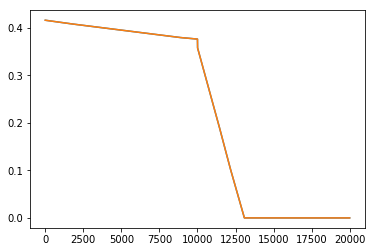

In [36]:
plt.plot(list(enumerate(range(len(rmse_a)))),rmse_a)

In [37]:
list(enumerate(range(10)))

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9)]

In [38]:
print (rmse_a)

[0.41612488, 0.41612032, 0.4161157, 0.4161111, 0.41610652, 0.41610193, 0.41609734, 0.41609278, 0.41608816, 0.41608354, 0.41607895, 0.41607437, 0.41606978, 0.4160652, 0.4160606, 0.416056, 0.41605145, 0.4160468, 0.4160422, 0.41603765, 0.416033, 0.41602847, 0.41602385, 0.41601926, 0.41601467, 0.41601008, 0.4160055, 0.41600087, 0.41599628, 0.4159917, 0.4159871, 0.4159825, 0.41597793, 0.41597334, 0.41596875, 0.41596413, 0.41595954, 0.41595495, 0.41595036, 0.4159458, 0.41594118, 0.4159366, 0.415932, 0.4159274, 0.41592282, 0.41591823, 0.4159136, 0.41590908, 0.41590443, 0.41589984, 0.41589528, 0.41589066, 0.41588607, 0.41588148, 0.41587692, 0.41587234, 0.41586775, 0.41586313, 0.4158585, 0.41585392, 0.41584933, 0.41584474, 0.41584018, 0.4158356, 0.415831, 0.4158264, 0.41582182, 0.41581723, 0.4158126, 0.41580805, 0.41580346, 0.41579884, 0.41579428, 0.4157897, 0.41578507, 0.41578048, 0.41577592, 0.41577128, 0.41576675, 0.41576216, 0.41575757, 0.41575298, 0.4157484, 0.41574377, 0.41573915, 0.41573

In [40]:
print (rmse_a[-1])

9.5306905e-06
